In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler,normalize
from sklearn.decomposition import PCA
import data_processing as dp
from scipy import signal
from scipy.stats import skew,zscore
import seaborn as sns
import matplotlib.pyplot as plt
import pywt
import os
import time
import h5py
from itertools import combinations
from PyEMD import EMD,EEMD

In [4]:
# read file name of data with various Labels
df = pd.read_csv('./useful_data_label.csv',index_col=0) 
# read file name of data with only label 0
df2 = pd.read_csv('./unuseful_data_label.csv',index_col=0)
# read some of the data with only label 0
df3 = pd.read_csv('./data/file_name.txt',header=None)

In [111]:
import imp
imp.reload(dp)

<module 'data_processing' from 'E:\\Document\\jupyter\\Master Thesis\\data_processing.py'>

In [83]:
# read the data and labels of df2 or df3
sc = StandardScaler(with_mean = False)
#sc = MinMaxScaler()
ind = df2.iloc[1].isna()
#files = np.concatenate([np.array(df.columns),np.array('正常/'+df2.columns[ind])])
files = np.array(df.columns[[2,3,4,5,6,7,8,9,10,11,12,13,16,17,18,19,20]])#[[2,5,6,7,8,10,11,12,13,16,17,18,19,20]])
N = len(files)
#sc = StandardScaler(with_mean=False)
width = 1024
stride = 256
start = time.time()
i = 0
X = []
Y = []
X2 = []
Y2 = []
F = []
F2 = []
for file in files:
    i += 1
    if file.find('G04')==0:
        continue
    emg_data = pd.read_csv('./data/detrend/detrend_50_'+file)
    #emg_data.iloc[:,3:] = 
    emg_data = emg_data.dropna().reset_index(drop=True)
    #emg_data.iloc[:,3:]=normalize(emg_data.iloc[:,3:],axis=0)
    #emg_data.iloc[:,3:] = sc.fit_transform(emg_data.iloc[:,3:])
    #for j in (0,1,4,5):
        #ind = abs(zscore(emg_data.iloc[:,j+3]))>10
        #emg_data=emg_data.loc[~ind,:]
        #ind_p = zscore(emg_data.iloc[:,j+3])>10
        #ind_n = zscore(emg_data.iloc[:,j+3])<-10
        #emg_data.loc[ind_p,emg_data.columns[3+j]] = emg_data.loc[~ind_p,emg_data.columns[3+j]].max()
        #emg_data.loc[ind_n,emg_data.columns[3+j]] = emg_data.loc[~ind_n,emg_data.columns[3+j]].min()
    fn = 400
    wn=2*fn/1000
    fn1 = 300
    wn1 = 2*fn1/1000
    #fs = 1000.0  # Sample frequency (Hz)
    #f0 = 50  # Frequency to be removed from signal (Hz)
    #Q = 100.0  # Quality factor
    # Design notch filter
    #b1, a1 = signal.iirnotch(f0, Q, fs)
    #b, a = signal.butter(4, [wn,wn1], 'bandpass')
    b, a = signal.butter(4, [wn], 'lowpass')
    for j in ['LEFT_TA','LEFT_TS','LEFT_BF','LEFT_RF','RIGHT_TA','RIGHT_TS','RIGHT_BF','RIGHT_RF']:
        emg_data.loc[:,j] = signal.filtfilt(b, a, emg_data.loc[:,j])
        #emg_data.loc[:,j] = signal.filtfilt(b1, a1, emg_data.loc[:,j])
    """if file==files[5]:
        fs = 1000.0  # Sample frequency (Hz)
        f0 = 72  # Frequency to be removed from signal (Hz)
        Q = 50.0  # Quality factor
        # Design notch filter
        b1, a1 = signal.iirnotch(f0, Q, fs)
        emg_data.loc[:,'LEFT_TA'] = signal.filtfilt(b1, a1, emg_data.loc[:,'LEFT_TA'])
        f0 = 75  # Frequency to be removed from signal (Hz)
        b1, a1 = signal.iirnotch(f0, Q, fs)
        emg_data.loc[:,'LEFT_TS'] = signal.filtfilt(b1, a1, emg_data.loc[:,'LEFT_TS'])
        f0 = 13.2  # Frequency to be removed from signal (Hz)
        b1, a1 = signal.iirnotch(f0, Q, fs)
        emg_data.loc[:,'RIGHT_TS'] = signal.filtfilt(b1, a1, emg_data.loc[:,'RIGHT_TS'])
    if file==files[6]:
        fs = 1000.0  # Sample frequency (Hz)
        f0 = 40  # Frequency to be removed from signal (Hz)
        Q = 100.0  # Quality factor
        # Design notch filter
        b1, a1 = signal.iirnotch(f0, Q, fs)
        emg_data.loc[:,'LEFT_TA'] = signal.filtfilt(b1, a1, emg_data.loc[:,'LEFT_TA'])
        f0 = 26.5  # Frequency to be removed from signal (Hz)
        b1, a1 = signal.iirnotch(f0, Q, fs)
        emg_data.loc[:,'LEFT_TS'] = signal.filtfilt(b1, a1, emg_data.loc[:,'LEFT_TS'])
        f0 = 13.2  # Frequency to be removed from signal (Hz)
        b1, a1 = signal.iirnotch(f0, Q, fs)
        emg_data.loc[:,'LEFT_TS'] = signal.filtfilt(b1, a1, emg_data.loc[:,'LEFT_TS'])
        f0 = 48  # Frequency to be removed from signal (Hz)
        b1, a1 = signal.iirnotch(f0, Q, fs)
        #emg_data.loc[:,'LEFT_TS'] = signal.filtfilt(b1, a1, emg_data.loc[:,'LEFT_TS'])
        f0 = 50  # Frequency to be removed from signal (Hz)
        b1, a1 = signal.iirnotch(f0, Q, fs)
        emg_data.loc[:,'RIGHT_TA'] = signal.filtfilt(b1, a1, emg_data.loc[:,'RIGHT_TA'])
    if file==files[7]:
        fs = 1000.0  # Sample frequency (Hz)
        f0 = 13.2  # Frequency to be removed from signal (Hz)
        Q = 50.0  # Quality factor
        # Design notch filter
        b1, a1 = signal.iirnotch(f0, Q, fs)
        emg_data.loc[:,'LEFT_TS'] = signal.filtfilt(b1, a1, emg_data.loc[:,'LEFT_TS'])
        emg_data.loc[:,'RIGHT_TS'] = signal.filtfilt(b1, a1, emg_data.loc[:,'RIGHT_TS'])
        f0 = 26.5  # Frequency to be removed from signal (Hz)
        b1, a1 = signal.iirnotch(f0, Q, fs)
        emg_data.loc[:,'LEFT_TS'] = signal.filtfilt(b1, a1, emg_data.loc[:,'LEFT_TS'])
        f0 = 50  # Frequency to be removed from signal (Hz)
        b1, a1 = signal.iirnotch(f0, Q, fs)
        emg_data.loc[:,'LEFT_TS'] = signal.filtfilt(b1, a1, emg_data.loc[:,'LEFT_TS'])
    """
    #emg_data.iloc[:,3:] = sc.fit_transform(emg_data.iloc[:,3:])
    #emg_data.iloc[:,3:]=normalize(emg_data.iloc[:,3:],axis=0)
    x,y = dp.generate_window_slide_data(emg_data,width=width,
                                        stride=stride,
                                        scaler=False,
                                        same_label=True)
    #x=np.abs(x)
    #x=dp.lowpass_filter(x,300)
    #x=dp.mean_smooth(x)
    ind1 = []
    ind2 = []
    l = len(y)
    for j in set(y):
        ind = np.where(y == j)[0].tolist()
        l_t = len(ind)
        ind1 += ind[:int(l_t*0.8)]
        ind2 += ind[int(l_t*0.8):]

    l1 = len(ind1)
    l2 = len(ind2)

    fi = [file]*len(ind1)
    fi2 = [file]*len(ind2)
    X += x[ind1].tolist()
    Y += y[ind1].tolist()
    F += fi
    X2 += x[ind2].tolist()
    Y2 += y[ind2].tolist()
    F2 += fi2
    print('%d/%d: '%(i,N)+file)

ind_c = [True,True,False,False,True,True,False,False]
X = np.array(X)#[:,:,ind_c]
Y = np.array(Y)
X2 = np.array(X2)#[:,:,ind_c]
Y2 = np.array(Y2)
end = time.time()
duration = end-start
print('Duration: %f'%(duration))

1/17: G06_FoG_trial_1_emg.csv
2/17: G06_FoG_trial_2_emg.csv
3/17: G06_FoG_trial_3_emg.csv
4/17: G07_Freezing_Trial1_trial_1_emg.csv
5/17: G08_FoG_1_trial_1_emg.csv
6/17: G08_FoG_2_trial_1_emg.csv
7/17: G11_FoG_trial_1_emg.csv
8/17: G11_FoG_trial_2_emg.csv
9/17: P379_M050_2_OFF_A_FoG_trial_1_emg.csv
10/17: P379_M050_2_OFF_A_FoG_trial_2_emg.csv
11/17: P379_M050_2_OFF_A_FoG_trial_3_emg.csv
12/17: P379_M050_2_OFF_B_FoG_trial_1_emg.csv
13/17: P551_M050_2_A_FoG_trial_1_emg.csv
14/17: P551_M050_2_B_FoG_trial_1_emg.csv
15/17: P551_M050_2_B_FoG_trial_2_emg.csv
16/17: P812_M050_2_B_FoG_trial_1_emg.csv
17/17: P812_M050_2_B_FoG_trial_2_emg.csv
Duration: 16.137861


In [127]:
(Y==1).sum()

433

In [54]:
# read the data and labels of df2 or df3
sc = StandardScaler()
#sc = MinMaxScaler()
ind = df2.iloc[1].isna()
#files = np.concatenate([np.array(df.columns),np.array('正常/'+df2.columns[ind])])
#files = np.array(df.columns)
files = np.array(df.columns[[2,5,6,7,8,10,11,12,13,16,17,18,19,20]])
N = len(files)
#sc = StandardScaler(with_mean=False)
width = 1024
stride = 256
start = time.time()
i = 0
X = []
Y = []
X2 = []
Y2 = []
F = []
F2 = []
for file in files:
    i += 1
    emg_data = pd.read_csv('./data/'+file)
    #emg_data.iloc[:,3:] = 
    emg_data = emg_data.dropna().reset_index(drop=True)
    #emg_data.iloc[:,3:]=normalize(emg_data.iloc[:,3:])
    #emg_data.iloc[:,3:] = sc.fit_transform(emg_data.iloc[:,3:])
    fn = 20
    wn=2*fn/1000
    fn1 = 350
    wn1 = 2*fn1/1000
    fs = 1000.0  # Sample frequency (Hz)
    f0 = 50  # Frequency to be removed from signal (Hz)
    Q = 100.0  # Quality factor
    # Design notch filter
    b1, a1 = signal.iirnotch(f0, Q, fs)
    b, a = signal.butter(4, [wn,wn1], 'bandpass')
    #b, a = signal.butter(4, [wn], 'highpass')
    #for j in ['LEFT_TA','LEFT_TS','LEFT_BF','LEFT_RF','RIGHT_TA','RIGHT_TS','RIGHT_BF','RIGHT_RF']:
        #emg_data.loc[:,j] = signal.filtfilt(b, a, emg_data.loc[:,j])
        #emg_data.loc[:,j] = signal.filtfilt(b1, a1, emg_data.loc[:,j])
    x,y = dp.generate_window_slide_data(emg_data,width=width,
                                        stride=stride,
                                        scaler=False,
                                        same_label=True)
    #x=np.abs(x)
    #x=dp.lowpass_filter(x,300)
    
    if file == 'G08_FoG_1_trial_1_emg.csv':
        X2 += x.tolist()
        Y2 += y.tolist()
        print('%d/%d: '%(i,N)+file)
        continue

    X += x.tolist()
    Y += y.tolist()

    print('%d/%d: '%(i,N)+file)
    
X = np.array(X)
Y = np.array(Y)
X2 = np.array(X2)
Y2 = np.array(Y2)
end = time.time()
duration = end-start
print('Duration: %f'%(duration))

1/14: G06_FoG_trial_1_emg.csv
2/14: G07_Freezing_Trial1_trial_1_emg.csv
3/14: G08_FoG_1_trial_1_emg.csv
4/14: G08_FoG_2_trial_1_emg.csv
5/14: G11_FoG_trial_1_emg.csv
6/14: P379_M050_2_OFF_A_FoG_trial_1_emg.csv
7/14: P379_M050_2_OFF_A_FoG_trial_2_emg.csv
8/14: P379_M050_2_OFF_A_FoG_trial_3_emg.csv
9/14: P379_M050_2_OFF_B_FoG_trial_1_emg.csv
10/14: P551_M050_2_A_FoG_trial_1_emg.csv
11/14: P551_M050_2_B_FoG_trial_1_emg.csv
12/14: P551_M050_2_B_FoG_trial_2_emg.csv
13/14: P812_M050_2_B_FoG_trial_1_emg.csv
14/14: P812_M050_2_B_FoG_trial_2_emg.csv
Duration: 16.192598


In [263]:
coes = pywt.wavedec(X,wavelet=wavelet,mode=0,level=level,axis=1)

In [ ]:
rec=pywt.idwt(coes[0],coes[3],wavelet='db10',mode=0,axis=1)

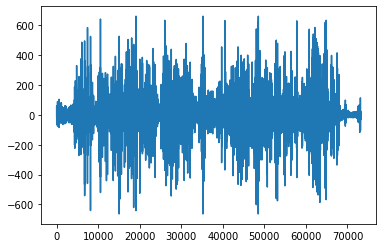

In [224]:
plt.plot(emg_data.iloc[:,3])
#rec.shape

In [4]:
def get_features_from_dwt(data,wavelet='db7',level=5,mode=0):
    coes = pywt.wavedec(data,wavelet=wavelet,mode=mode,level=level,axis=1)
    n,l,c = coes[-1].shape
    feature = np.zeros((n,l,c,0))
    for i in range(len(coes)-1):
        #if i == 0:
        #    rec = pywt.idwt(coes[i],None,wavelet=wavelet,mode=mode,axis=1)
        #else:
        #    rec = pywt.idwt(None,coes[i],wavelet=wavelet,mode=mode,axis=1)
        temp = signal.resample(coes[i],l,axis=1)[:,:,:,np.newaxis]
        feature = np.concatenate([feature,temp],axis=3)
        #print(feature.shape)
    #print(coes[-1].shape)
    #rec = pywt.idwt(None,coes[-1],wavelet=wavelet,mode=mode,axis=1)
    #print(rec.shape)
    feature = np.concatenate([feature,coes[-1][:,:,:,np.newaxis]],axis=3)
    return feature

def get_idwt(data,wavelet='db7',level=5,mode=0):
    coes = pywt.wavedec(data,wavelet=wavelet,mode=mode,level=level,axis=1)
    n,l,c = data.shape
    feature = np.zeros((n,l,c,0))
    for i in range(len(coes)-1):
        if i == 0:
            rec = pywt.idwt(coes[i],None,wavelet=wavelet,mode=mode,axis=1)
        else:
            rec = pywt.idwt(None,coes[i],wavelet=wavelet,mode=mode,axis=1)
        temp = signal.resample(coes[i],l,axis=1)[:,:,:,np.newaxis]
        feature = np.concatenate([feature,temp],axis=3)
        #print(feature.shape)
    #print(coes[-1].shape)
    rec = pywt.idwt(None,coes[-1],wavelet=wavelet,mode=mode,axis=1)
    #print(rec.shape)
    feature = np.concatenate([feature,rec[:,:,:,np.newaxis]],axis=3)
    return feature

def get_features_from_idwt(data,wavelet='db7',level=5):
    #coes = pywt.wavedec(data,wavelet=wavelet,mode=0,level=level,axis=1)
    coes = get_features_from_dwt(data,wavelet,level)
    n,l,c,d = coes.shape
    feature = np.zeros((n,8,0))
    for i in range(d):
        #IEMG = pd.DataFrame(compute_IEMG(coes[i]),columns=columns+'_IEMG')
        RMS = dp.compute_RMS(coes[:,:,:,i])[:,:,np.newaxis]
        #WL = pd.DataFrame(dp.compute_WL(coes[i]),columns=columns+'_WL%d'%i)
        ZC = dp.compute_ZC(coes[:,:,:,i],1e-3)[:,:,np.newaxis]
        ku = dp.compute_ku(coes[:,:,:,i])[:,:,np.newaxis]
        #SSC = pd.DataFrame(dp.compute_SSC(coes[i],threshold_SSC),columns=columns+'_SSC%d'%i)
        #WAMP = dp.compute_WAMP(coes[:,:,:,i],threshold_WAMP)[:,:,np.newaxis]
        skew = dp.compute_Skewness(coes[:,:,:,i])[:,:,np.newaxis]
        Acti = dp.compute_Acti(coes[:,:,:,i])[:,:,np.newaxis]
        AR = dp.compute_AR(coes[:,:,:,i])[:,:,np.newaxis]
        #AR = dp.compute_AR_pd(coes[i])
        #HIST = dp.compute_HIST_pd(coes[i],bins=bins,ranges=ranges)
        #FHIST = dp.compute_FHIST_pd(coes[i],bins=fbins,ranges=franges,threshold=threshold_F)
        #MF = dp.compute_MaxFreq_pd(coes[i],num=num)
        MDF = dp.compute_MDF(coes[:,:,:,i])[:,:,np.newaxis]
        MNF = dp.compute_MNF(coes[:,:,:,i])[:,:,np.newaxis]
        feature = np.concatenate([feature,RMS,ZC,ku,skew,Acti,AR,MDF,MNF],axis =2)
    return feature

def get_emd(data,max_imf=5):
    emd = EMD()
    n,l,c=data.shape
    feature = np.zeros((n,c,l,max_imf+1))
    for i in range(n):
        for j in range(c):
            feature[i,j,:,:]=emd(data[i,:,j],max_imf=max_imf).T
    return feature

def get_eemd(data,max_imf=5):
    eemd = EEMD()
    n,l,c=data.shape
    feature = np.zeros((n,c,l,max_imf+1))
    for i in range(n):
        for j in range(c):
            feature[i,j,:,:]=eemd(data[i,:,j],max_imf=max_imf).T
    return feature

In [5]:
wavelet = 'haar'
level = 5
feature=get_features_from_dwt(X,wavelet,level,1).transpose((0,2,1,3))
feature2=get_features_from_dwt(X2,wavelet,level,1).transpose((0,2,1,3))
#feature=get_idwt(X,wavelet,level).transpose((0,2,1,3))
#feature2=get_idwt(X2,wavelet,level).transpose((0,2,1,3))

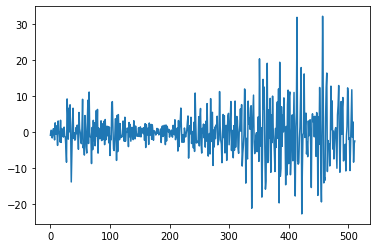

In [17]:
plt.plot(feature[1000,7,:,5])
#plt.figure()
#plt.plot(feature.transpose((0,2,1,3))[10,0,:,4])

In [ ]:
feature = get_eemd(X)
feature2=get_eemd(X2)

In [ ]:
path = './processed data/eemd_data_W1024_S256_lp350.hdf5'
with h5py.File(path,'w') as f:
    f.create_dataset('feature',data=feature,
                    chunks = True,dtype = np.float32)
    f.create_dataset('label1',data=np.array(Y), dtype = np.int8)
    f.create_dataset('feature2',data=feature2,
                    chunks = True,dtype = np.float32)
    f.create_dataset('label2',data=np.array(Y2), dtype = np.int8)

In [240]:
path = './processed data/emd_data_W1024_S256.hdf5'
with h5py.File(path,'r') as f:
    feature=f['feature'][...]
    feature2=f['feature2'][...] 
    Y = f['label1'][...]
    Y2 = f['label2'][...]

In [36]:
eemd = EEMD()
imfs = eemd(X[0,:,0])

In [48]:
feature.shape

(2199, 8, 1024, 6)

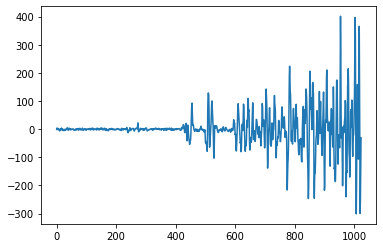

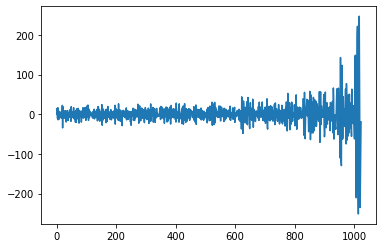

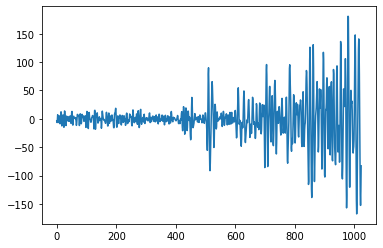

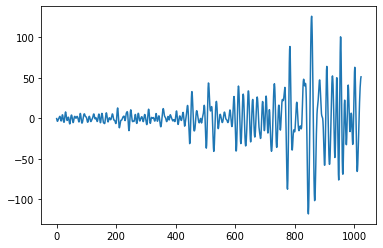

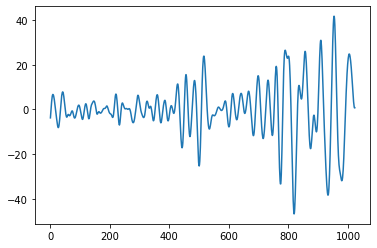

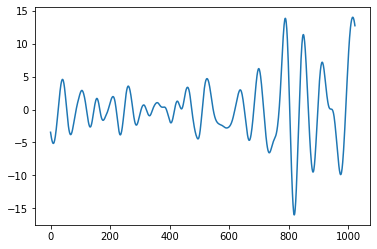

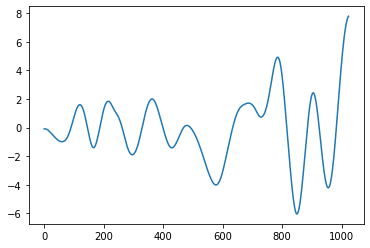

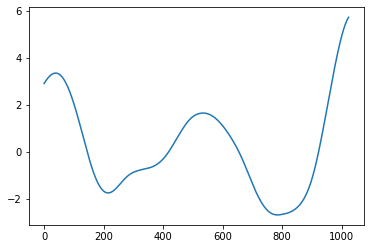

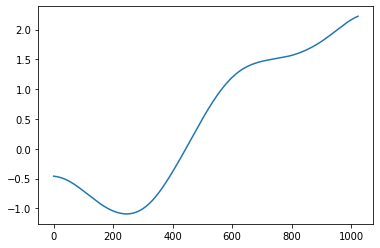

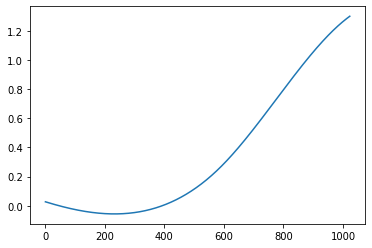

In [42]:
#plt.figure(figsize=(12,8))
plt.plot(X[0,:,0])
for i in range(9):
    plt.figure()
    plt.plot(imfs[i])
#plt.plot(feature[0,1,:,5])

In [6]:
from tensorflow import keras
from tensorflow.keras import layers,regularizers
from tensorflow.keras.models import save_model,load_model
from tensorflow.keras import callbacks, Model, models
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy
from tensorflow.keras.utils import plot_model
from tensorflow.keras.initializers import TruncatedNormal
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve,confusion_matrix,accuracy_score
import tensorflow as tf
from tensorflow.keras import backend as K
from imblearn.over_sampling import SMOTE

In [7]:
def train_model(model,feature,y,binary=True,file=None):
    if binary:
        ind = ((y==0)|(y==1)|(y==2)|(y==3)|(y==4)|(y==6))
        ind1 = ((y==4)|(y==1)|(y==2)|(y==3)|(y==6))
        y_01 = y.copy()
        #ind1 = ((y_01==1)|(y_01==2)|(y_01==6))
        y_01[ind1] = 1
        oc = OneHotEncoder()
        y_01 = oc.fit_transform(np.array(y_01)[:,np.newaxis]).toarray()
        cw = None#{0:1,1:5}
    else:
        ind = ((y==1)|(y==2)|(y==6))
        #ind = ((y==2)|(y==6))
        y_01 = y[ind].copy()
        oc = OneHotEncoder()
        y_01 = oc.fit_transform(np.array(y_01)[:,np.newaxis]).toarray()
        cw = None#{0:1,1:2}#{0:2,1:1,2:10,3:2}
    x_full,x_test,y_full,y_test = train_test_split(np.array(feature)[ind],y_01,
                                                   test_size=0.2,
                                                   random_state=123,
                                                   shuffle=True)
    x_train,x_valid,y_train,y_valid = train_test_split(x_full,y_full,
                                                       test_size=0.25,
                                                       random_state=555,
                                                       shuffle=True)
    
    x_train = x_full
    
    early_stopping = callbacks.EarlyStopping(patience = 10,
                                             monitor = 'val_loss', 
                                             restore_best_weights=True)
    history = model.fit(x_train,y_full,validation_data=(x_test,y_test),
                        epochs=200,batch_size=32,class_weight=cw,
                        callbacks=[early_stopping],
                        shuffle=True)
    
    if binary:
        y_pred_t=model.predict(x_test)
        test = accuracy_score(np.argmax(y_test,axis=1),np.argmax(y_pred_t,axis=1))
        #test = accuracy_score(y_test,y_pred_t>0.5)
        
        #y_pred_v=model.predict(x_valid)
        #valid = accuracy_score(y_valid,np.argmax(y_pred_v,axis=1))
        y_pred_ta=model.predict(x_train)
        train = accuracy_score(np.argmax(y_full,axis=1),np.argmax(y_pred_ta,axis=1))
        #train = accuracy_score(y_full,y_pred_ta>0.5)
        
        print('train: \n',confusion_matrix(np.argmax(y_full,axis=1),np.argmax(y_pred_ta,axis=1)))
        #print('valid: \n',confusion_matrix(np.argmax(y_valid,axis=1),np.argmax(y_pred_v,axis=1)))
        print('test: \n',confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred_t,axis=1)))
        
        #print('train: \n',metrics.confusion_matrix(y_full,y_pred_ta>0.5))
        #print('test: \n',metrics.confusion_matrix(y_test,y_pred_t>0.5))

    else:
        y_pred_t=model.predict(x_test)
        test = accuracy_score(np.argmax(y_test,axis=1),np.argmax(y_pred_t,axis=1))
        #y_pred_v=model.predict(x_valid)
        #valid = metrics.accuracy_score(np.argmax(y_valid,axis=1),np.argmax(y_pred_v,axis=1))
        y_pred_ta=model.predict(x_train)
        train = accuracy_score(np.argmax(y_full,axis=1),np.argmax(y_pred_ta,axis=1))        
        print('train: \n',confusion_matrix(np.argmax(y_full,axis=1),np.argmax(y_pred_ta,axis=1)))
        #print('valid: \n',confusion_matrix(np.argmax(y_valid,axis=1),np.argmax(y_pred_v,axis=1)))
        print('test: \n',confusion_matrix(np.argmax(y_test,axis=1),np.argmax(y_pred_t,axis=1)))
    print('test:%f'%test)
    #print('valid:%f'%valid)
    print('train:%f'%train)
    if file != None:
        model.save_model(file)
    return train,test

def test_model(model,feature,y,binary=True):
    if binary:
        ind = ((y==0)|(y==1)|(y==2)|(y==3)|(y==4)|(y==6))
        #ind1 = ((y==4)|(y==1)|(y==2)|(y==3)|(y==6))
        y_01 = y[ind].copy()
        ind1 = ((y_01==1)|(y_01==2)|(y_01==6))
        y_01[ind1] = 1
        oc = OneHotEncoder()
        y_01 = oc.fit_transform(np.array(y_01)[:,np.newaxis]).toarray()
        cw = None#{0:1,1:5}
    else:
        ind = ((y==1)|(y==2)|(y==6))
        #ind = ((y==2)|(y==6))
        y_01 = y[ind].copy()
        oc = OneHotEncoder()
        y_01 = oc.fit_transform(np.array(y_01)[:,np.newaxis]).toarray()
        cw = None#{0:5,1:1,2:1}#{0:2,1:1,2:10,3:2}

    #print(y_01)
    #feature=sc.transform(feature[ind])
    #feature=pca.transform(feature)
    y_pred=model.predict(feature[ind])
    test = accuracy_score(np.argmax(y_01,axis=1),np.argmax(y_pred,axis=1))
    #test = metrics.accuracy_score(y_01,y_pred>0.5)
    
    print('acc:%f'%test)
    print(confusion_matrix(np.argmax(y_01,axis=1),np.argmax(y_pred,axis=1)))
    #print(metrics.confusion_matrix(y_01,y_pred>0.5))
    return test

def sparse_cost_sensitive_loss (y_true,y_pred):
    #cost_matrix = tf.constant([[0,1.5,1,1.5],
    #              [1,0,1,1],
    #              [5,10,0,5],
    #              [1.,1.,1,0]])
    #cost_matrix = tf.constant([[0,1.,1],
    #              [1,0,1],
    #              [1.0,1.,0]])
    cost_matrix = tf.constant([[0,1.],
                  [1,0]])
    batch_cost_matrix = tf.nn.embedding_lookup(cost_matrix, tf.argmax(y_true,axis=1))
    eps = 1e-6
    probability = tf.clip_by_value(y_pred, eps, 1-eps)
    cost_values = tf.math.log(1-probability)*batch_cost_matrix
    loss = tf.reduce_mean(-tf.reduce_sum(cost_values, axis=1))
    return loss

In [84]:
rate=0.2
kernel_size=5
kernel_size2=5
kernel_size3=3
stride=1
axis=1
reg=0
acti='relu'

In [85]:
input_ = layers.Input(shape=X[:,:,:].shape[1:])
#bn = layers.BatchNormalization()(input_)
#max_pool = layers.MaxPooling2D((1,2))(input_)
#bn = layers.BatchNormalization()(input_)

cnn1 = layers.Conv1D(256,kernel_size,strides=stride,
                      #kernel_initializer=TruncatedNormal(),
                     #activation=acti, #use_bias=False,
                     kernel_regularizer=regularizers.l2(reg),
                      padding='same')(input_)
#cnn1 = layers.Conv1D(256,kernel_size3,strides=2,
                      #kernel_initializer=TruncatedNormal(),
                      #use_bias=False,#activation='elu',
#                      padding='same')(cnn1)
#cnn1 = layers.BatchNormalization()(cnn1)
#cnn1 = layers.LayerNormalization(axis=axis)(cnn1)
cnn1 = layers.Activation(acti)(cnn1)
#cnn1 = layers.LeakyReLU(alpha=0.2)(cnn1)
cnn1 = layers.AveragePooling1D(2)(cnn1)
#cnn1 = layers.MaxPooling1D(2)(cnn1)
cnn1 = layers.Dropout(rate)(cnn1)
#cnn1 = layers.MaxPooling2D((1,2))(cnn1)

cnn2 = layers.Conv1D(128,kernel_size,strides=stride,
                      #kernel_initializer=TruncatedNormal(),
                     #activation=acti,#use_bias=False,
                     kernel_regularizer=regularizers.l2(reg),
                      padding='same')(cnn1)
#cnn2 = layers.Conv1D(128,kernel_size3,strides=2,
                      #kernel_initializer=TruncatedNormal(),
                      #use_bias=False,#activation='elu',
#                      padding='same')(cnn2)
#cnn2 = layers.BatchNormalization(momentum=0.8)(cnn2)
cnn2 = layers.Activation(acti)(cnn2)
#cnn2 = layers.LeakyReLU(alpha=0.2)(cnn2)
cnn2 = layers.BatchNormalization(momentum=0.8)(cnn2)
#cnn2 = layers.LayerNormalization(axis=axis)(cnn2)
cnn2 = layers.AveragePooling1D(2)(cnn2)
#cnn2 = layers.MaxPooling1D(2)(cnn2)
cnn2 = layers.Dropout(rate)(cnn2)
#cnn2 = layers.MaxPooling2D((1,2))(cnn2)

cnn3 = layers.Conv1D(64,kernel_size,strides=stride,
                      #kernel_initializer=TruncatedNormal(),
                     # activation=acti,#use_bias=False,
                     kernel_regularizer=regularizers.l2(reg),
                      padding='same')(cnn2)
#cnn3 = layers.Conv1D(64,kernel_size3,strides=2,
                      #kernel_initializer=TruncatedNormal(),
                      #use_bias=False,#activation='elu',
#                      padding='same')(cnn3)
#cnn3 = layers.BatchNormalization(momentum=0.8)(cnn3)
cnn3 = layers.Activation(acti)(cnn3)
#cnn3 = layers.LeakyReLU(alpha=0.2)(cnn3)
cnn3 = layers.BatchNormalization(momentum=0.8)(cnn3)
#cnn3 = layers.LayerNormalization(axis=axis)(cnn3)
cnn3 = layers.AveragePooling1D(2)(cnn3)
#cnn3 = layers.MaxPooling1D(2)(cnn3)
cnn3 = layers.Dropout(rate)(cnn3)
#cnn3 = layers.MaxPooling2D((1,2))(cnn3)

cnn4 = layers.Conv1D(32,kernel_size,strides=stride,
                      #kernel_initializer=TruncatedNormal(),
                      #activation=acti,#use_bias=False,
                     kernel_regularizer=regularizers.l2(reg),
                      padding='same')(cnn3)
#cnn4 = layers.Conv1D(32,kernel_size3,strides=2,
                      #kernel_initializer=TruncatedNormal(),
                      #use_bias=False,#activation='elu',
#                      padding='same')(cnn4)
#cnn4 = layers.BatchNormalization(momentum=0.8)(cnn4)
cnn4 = layers.Activation(acti)(cnn4)
#cnn4 = layers.LeakyReLU(alpha=0.2)(cnn4)
cnn4 = layers.BatchNormalization(momentum=0.8)(cnn4)
#cnn4 = layers.LayerNormalization(axis=axis)(cnn4)
cnn4 = layers.AveragePooling1D(2)(cnn4)
#cnn4 = layers.MaxPooling1D(2)(cnn4)
cnn4 = layers.Dropout(rate)(cnn4)
#cnn4 = layers.MaxPooling2D((1,2))(cnn4)

cnn5 = layers.Conv1D(16,kernel_size2,strides=stride,
                      #kernel_initializer=TruncatedNormal(),
                     #activation=acti,#use_bias=False,
                     kernel_regularizer=regularizers.l2(reg),
                      padding='same')(cnn4)
#cnn5 = layers.Conv1D(16,kernel_size3,strides=2,
                      #kernel_initializer=TruncatedNormal(),
                      #use_bias=False,#activation='elu',
#                      padding='same')(cnn4)
#cnn5 = layers.BatchNormalization(momentum=0.8)(cnn5)
cnn5 = layers.Activation(acti)(cnn5)
#cnn5 = layers.LeakyReLU(alpha=0.2)(cnn5)
#cnn6 = layers.GlobalAveragePooling2D()(cnn5)
cnn5 = layers.BatchNormalization(momentum=0.8)(cnn5)
#cnn5 = layers.LayerNormalization(axis=axis)(cnn5)
cnn5 = layers.AveragePooling1D(2)(cnn5)
#cnn5 = layers.MaxPooling1D(2)(cnn5)
cnn5 = layers.Dropout(rate)(cnn5)
#cnn5 = layers.MaxPooling2D((1,2))(cnn5)

cnn6 = layers.Conv1D(8,kernel_size2,strides=stride,
                      #kernel_initializer=TruncatedNormal(),
                     #activation=acti,#use_bias=False,
                     kernel_regularizer=regularizers.l2(reg),
                      padding='same')(cnn5)
#cnn6 = layers.Conv1D(8,kernel_size3,strides=2,
                      #kernel_initializer=TruncatedNormal(),
                      #use_bias=False,#activation='elu',
#                      padding='same')(cnn6)
#cnn6 = layers.BatchNormalization(momentum=0.8)(cnn6)
cnn6 = layers.Activation(acti)(cnn6)
#cnn6 = layers.LeakyReLU(alpha=0.2)(cnn6)
cnn6 = layers.BatchNormalization(momentum=0.8)(cnn6)
#cnn6 = layers.LayerNormalization(axis=axis)(cnn6)
cnn6 = layers.AveragePooling1D(2)(cnn6)
#cnn6 = layers.GlobalAveragePooling2D()(cnn6)
#cnn6 = layers.MaxPooling1D(2)(cnn6)
cnn6 = layers.Dropout(rate)(cnn6)
#cnn6 = layers.MaxPooling2D((1,2))(cnn6)

cnn7 = layers.Conv1D(4,kernel_size2,strides=stride,
                      #kernel_initializer=TruncatedNormal(),
                     #activation=acti, #use_bias=False,
                     kernel_regularizer=regularizers.l2(reg),
                      padding='same')(cnn6)
#cnn7 = layers.Conv1D(4,kernel_size3,strides=2,
                      #kernel_initializer=TruncatedNormal(),
                      #use_bias=False,#activation='elu',
#                      padding='same')(cnn7)
#cnn7 = layers.BatchNormalization(momentum=0.8)(cnn7)
cnn7 = layers.Activation(acti)(cnn7)
#cnn7 = layers.LeakyReLU(alpha=0.2)(cnn7)
cnn7 = layers.BatchNormalization(momentum=0.8)(cnn7)
#cnn7 = layers.LayerNormalization(axis=axis)(cnn7)
cnn7 = layers.AveragePooling1D(2)(cnn7)
#cnn7 = layers.GlobalAveragePooling1D()(cnn7)
#cnn7 = layers.MaxPooling1D(2)(cnn7)
cnn7 = layers.Dropout(rate)(cnn7)
#cnn6 = layers.MaxPooling2D((1,2))(cnn6)

flatten = layers.Flatten()(cnn7)
dropout = layers.Dropout(rate)(flatten)
#layer1 = layers.Dense(256,activation = 'relu')(dropout)
#dropout1 = layers.Dropout(0.2)(layer1)
#layer2 = layers.Dense(128,activation = 'relu')(dropout1)
#dropout2 = layers.Dropout(0.2)(layer2)
output = layers.Dense(3,activation = 'softmax')(dropout)
model = Model(inputs=[input_],outputs=[output])

In [86]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#early_stopping = callbacks.EarlyStopping(patience = 10,monitor = 'val_accuracy', restore_best_weights=True)

In [87]:
model.summary()

Model: "functional_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 1024, 8)]         0         
_________________________________________________________________
conv1d_77 (Conv1D)           (None, 1024, 256)         10496     
_________________________________________________________________
activation_77 (Activation)   (None, 1024, 256)         0         
_________________________________________________________________
average_pooling1d_77 (Averag (None, 512, 256)          0         
_________________________________________________________________
dropout_88 (Dropout)         (None, 512, 256)          0         
_________________________________________________________________
conv1d_78 (Conv1D)           (None, 512, 128)          163968    
_________________________________________________________________
activation_78 (Activation)   (None, 512, 128)        

In [88]:
start = time.time()
train_model(model,X[:,:,:],Y,False)
end = time.time()
print(end-start)

Epoch 1/200
41/41 [==============================] - 26s 631ms/step - loss: 0.9530 - accuracy: 0.5539 - val_loss: 0.6720 - val_accuracy: 0.7256
Epoch 2/200
41/41 [==============================] - 26s 642ms/step - loss: 0.7666 - accuracy: 0.6478 - val_loss: 0.6525 - val_accuracy: 0.6921
Epoch 3/200
41/41 [==============================] - 23s 555ms/step - loss: 0.6890 - accuracy: 0.6952 - val_loss: 0.6314 - val_accuracy: 0.7134
Epoch 4/200
41/41 [==============================] - 22s 540ms/step - loss: 0.6350 - accuracy: 0.7242 - val_loss: 0.6110 - val_accuracy: 0.7165
Epoch 5/200
41/41 [==============================] - 22s 525ms/step - loss: 0.5788 - accuracy: 0.7456 - val_loss: 0.6174 - val_accuracy: 0.7165
Epoch 6/200
41/41 [==============================] - 22s 525ms/step - loss: 0.5612 - accuracy: 0.7448 - val_loss: 0.5412 - val_accuracy: 0.7683
Epoch 7/200
41/41 [==============================] - 24s 584ms/step - loss: 0.5245 - accuracy: 0.7594 - val_loss: 0.8532 - val_accuracy:

41/41 [==============================] - 26s 641ms/step - loss: 0.0540 - accuracy: 0.9809 - val_loss: 0.0424 - val_accuracy: 0.9848
Epoch 58/200
41/41 [==============================] - 25s 600ms/step - loss: 0.1046 - accuracy: 0.9610 - val_loss: 0.0732 - val_accuracy: 0.9787
Epoch 59/200
41/41 [==============================] - 23s 556ms/step - loss: 0.0685 - accuracy: 0.9801 - val_loss: 0.0586 - val_accuracy: 0.9756
Epoch 60/200
41/41 [==============================] - 27s 670ms/step - loss: 0.0882 - accuracy: 0.9717 - val_loss: 0.0412 - val_accuracy: 0.9848
Epoch 61/200
41/41 [==============================] - 22s 544ms/step - loss: 0.0837 - accuracy: 0.9748 - val_loss: 0.0409 - val_accuracy: 0.9817
Epoch 62/200
41/41 [==============================] - 22s 531ms/step - loss: 0.0673 - accuracy: 0.9786 - val_loss: 0.0902 - val_accuracy: 0.9787
Epoch 63/200
41/41 [==============================] - 21s 521ms/step - loss: 0.0892 - accuracy: 0.9710 - val_loss: 0.0654 - val_accuracy: 0.978

In [89]:
test_model(model,X2[:,:,:],Y2,False)

acc:0.824228
[[ 31  28  29]
 [  4 203   0]
 [  0  13 113]]


0.8242280285035629

In [47]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_91 (Conv1D)           (None, 4, 1024, 64)       832       
_________________________________________________________________
conv1d_92 (Conv1D)           (None, 4, 1024, 64)       8256      
_________________________________________________________________
conv1d_93 (Conv1D)           (None, 4, 1024, 64)       8256      
_________________________________________________________________
conv1d_94 (Conv1D)           (None, 4, 1024, 64)       8256      
_________________________________________________________________
conv1d_95 (Conv1D)           (None, 4, 1024, 64)       8256      
_________________________________________________________________
conv1d_96 (Conv1D)           (None, 4, 1024, 64)       8256      
_________________________________________________________________
conv1d_97 (Conv1D)           (None, 4, 1024, 64)     

In [48]:
ind = ((Y==1)|(Y==2)|(Y==6))
#ind = ((y==2)|(y==6))
y_01 = Y[ind].copy()
oc = OneHotEncoder()
y_01 = oc.fit_transform(np.array(y_01)[:,np.newaxis]).toarray()
ind2 = ((Y2==1)|(Y2==2)|(Y2==6))
#ind = ((y==2)|(y==6))
y_02 = Y2[ind2].copy()
y_02 = oc.transform(np.array(y_02)[:,np.newaxis]).toarray()

In [49]:
early_stopping = callbacks.EarlyStopping(patience = 10,
                                         monitor = 'val_loss', 
                                         restore_best_weights=True)
history = model.fit(np.array(feature[:,[0,1,4,5],:,:])[ind],y_01,validation_data=(np.array(feature2[:,[0,1,4,5],:,:])[ind2],y_02),
                    epochs=300,batch_size=32,#class_weight=cw,
                    callbacks=[early_stopping],
                    shuffle=True)

Epoch 1/300
50/50 [==============================] - 128s 3s/step - loss: 0.8704 - accuracy: 0.5348 - val_loss: 0.8780 - val_accuracy: 0.6601
Epoch 2/300
50/50 [==============================] - 117s 2s/step - loss: 0.8046 - accuracy: 0.6434 - val_loss: 0.9318 - val_accuracy: 0.6626
Epoch 3/300
50/50 [==============================] - 124s 2s/step - loss: 0.7448 - accuracy: 0.6629 - val_loss: 0.7547 - val_accuracy: 0.6822
Epoch 4/300
50/50 [==============================] - 129s 3s/step - loss: 0.7331 - accuracy: 0.6667 - val_loss: 0.7439 - val_accuracy: 0.6870
Epoch 5/300
50/50 [==============================] - 123s 2s/step - loss: 0.6586 - accuracy: 0.7031 - val_loss: 0.6047 - val_accuracy: 0.7335
Epoch 6/300
50/50 [==============================] - 128s 3s/step - loss: 0.6574 - accuracy: 0.7150 - val_loss: 0.6124 - val_accuracy: 0.7433
Epoch 7/300
50/50 [==============================] - 124s 2s/step - loss: 0.6173 - accuracy: 0.7301 - val_loss: 0.6294 - val_accuracy: 0.7555
Epoch 

In [50]:
test_model(model,np.array(feature2[:,[0,1,4,5],:,:]),Y2,False)

acc:0.767726
[[ 40  23  25]
 [ 21 165   9]
 [ 13   4 109]]


0.7677261613691931

In [6]:
import wavenet

In [65]:
import imp
imp.reload(wavenet)

<module 'wavenet' from 'E:\\Document\\jupyter\\Master Thesis\\wavenet.py'>

In [93]:
filters=20

In [94]:
def residual_block(x, i):
    tanh_out = layers.Conv1D(filters, 
                      2, 
                      dilation_rate = 2**i, 
                      padding='causal', 
                      name='dilated_conv_%d_tanh' % (2 ** i), 
                      activation='tanh'
                      )(x)
    sigm_out = layers.Conv1D(filters, 
                      2, 
                      dilation_rate = 2**i, 
                      padding='causal', 
                      name='dilated_conv_%d_sigm' % (2 ** i), 
                      activation='sigmoid'
                      )(x)
    z = layers.Multiply(name='gated_activation_%d' % (i))([tanh_out, sigm_out])
    skip = layers.Conv1D(filters, 1, name='skip_%d'%(i))(z)
    res = layers.Add(name='residual_block_%d' % (i))([skip, x])
    return res, skip

In [95]:
x = layers.Input(shape=(1024,8), name='original_input')
#x_reshaped = Reshape((1024,4) + (1,), name='reshaped_input')(x)
x_reshaped = x
skip_connections = []
out = layers.Conv1D(filters, 2, dilation_rate=1, padding='causal', name='dilated_conv_1')(x_reshaped)
for i in range(1, 6):
    out, skip = residual_block(out,i)
    skip_connections.append(skip)
out = layers.Add(name='skip_connections')(skip_connections)
out = layers.Activation('relu')(out)
out = layers.Conv1D(32, 7, strides = 1, padding='same', name='conv_5ms', activation = 'relu')(out)
out = layers.AveragePooling1D(2, padding='same', name='downsample_to_200Hz')(out)
out = layers.Conv1D(16, 7, padding='same', activation='relu', name='conv_500ms')(out)
#out = layers.Conv1D(3, 7, padding='same', activation='relu', name='conv_500ms_target_shape')(out)
out = layers.AveragePooling1D(2, padding='same',name = 'downsample_to_2Hz')(out)
out = layers.Conv1D(8, 7, padding='same', name='final_conv')(out)
#out = layers.AveragePooling1D(2, name='final_pooling')(out)
#out = layers.Reshape((2,))(out)
#out = layers.GlobalAveragePooling1D()(out)
out = layers.Flatten()(out)
out = layers.Dropout(0.2)(out)
out = layers.Dense(512,activation='relu')(out)
out = layers.Dropout(0.2)(out)
out = layers.Dense(3,activation='softmax')(out)
#out = layers.Activation('softmax')(out)
model = Model(x, out)  
model.summary()

Model: "functional_25"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
original_input (InputLayer)     [(None, 1024, 8)]    0                                            
__________________________________________________________________________________________________
dilated_conv_1 (Conv1D)         (None, 1024, 20)     340         original_input[0][0]             
__________________________________________________________________________________________________
dilated_conv_2_tanh (Conv1D)    (None, 1024, 20)     820         dilated_conv_1[0][0]             
__________________________________________________________________________________________________
dilated_conv_2_sigm (Conv1D)    (None, 1024, 20)     820         dilated_conv_1[0][0]             
______________________________________________________________________________________

In [96]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [97]:
start = time.time()
train_model(model,X[:,:,:],Y,False)
end = time.time()
print(end-start)

Epoch 1/200
41/41 [==============================] - 13s 325ms/step - loss: 1.0115 - accuracy: 0.5187 - val_loss: 0.8681 - val_accuracy: 0.6341
Epoch 2/200
41/41 [==============================] - 13s 318ms/step - loss: 0.5484 - accuracy: 0.7807 - val_loss: 0.7522 - val_accuracy: 0.6585
Epoch 3/200
41/41 [==============================] - 13s 310ms/step - loss: 0.2605 - accuracy: 0.9221 - val_loss: 0.6031 - val_accuracy: 0.7439
Epoch 4/200
41/41 [==============================] - 13s 310ms/step - loss: 0.0775 - accuracy: 0.9870 - val_loss: 0.6347 - val_accuracy: 0.7713
Epoch 5/200
41/41 [==============================] - 16s 385ms/step - loss: 0.0263 - accuracy: 0.9939 - val_loss: 0.6056 - val_accuracy: 0.8079
Epoch 6/200
41/41 [==============================] - 17s 406ms/step - loss: 0.0225 - accuracy: 0.9977 - val_loss: 0.7200 - val_accuracy: 0.7927
Epoch 7/200
41/41 [==============================] - 13s 317ms/step - loss: 0.0181 - accuracy: 0.9939 - val_loss: 0.7140 - val_accuracy:

In [99]:
test_model(model,X2[:,:,:],Y2,False)

acc:0.634204
[[ 26  29  33]
 [ 10 176  21]
 [ 17  44  65]]


0.6342042755344418

In [397]:
(Y==6).sum()

499

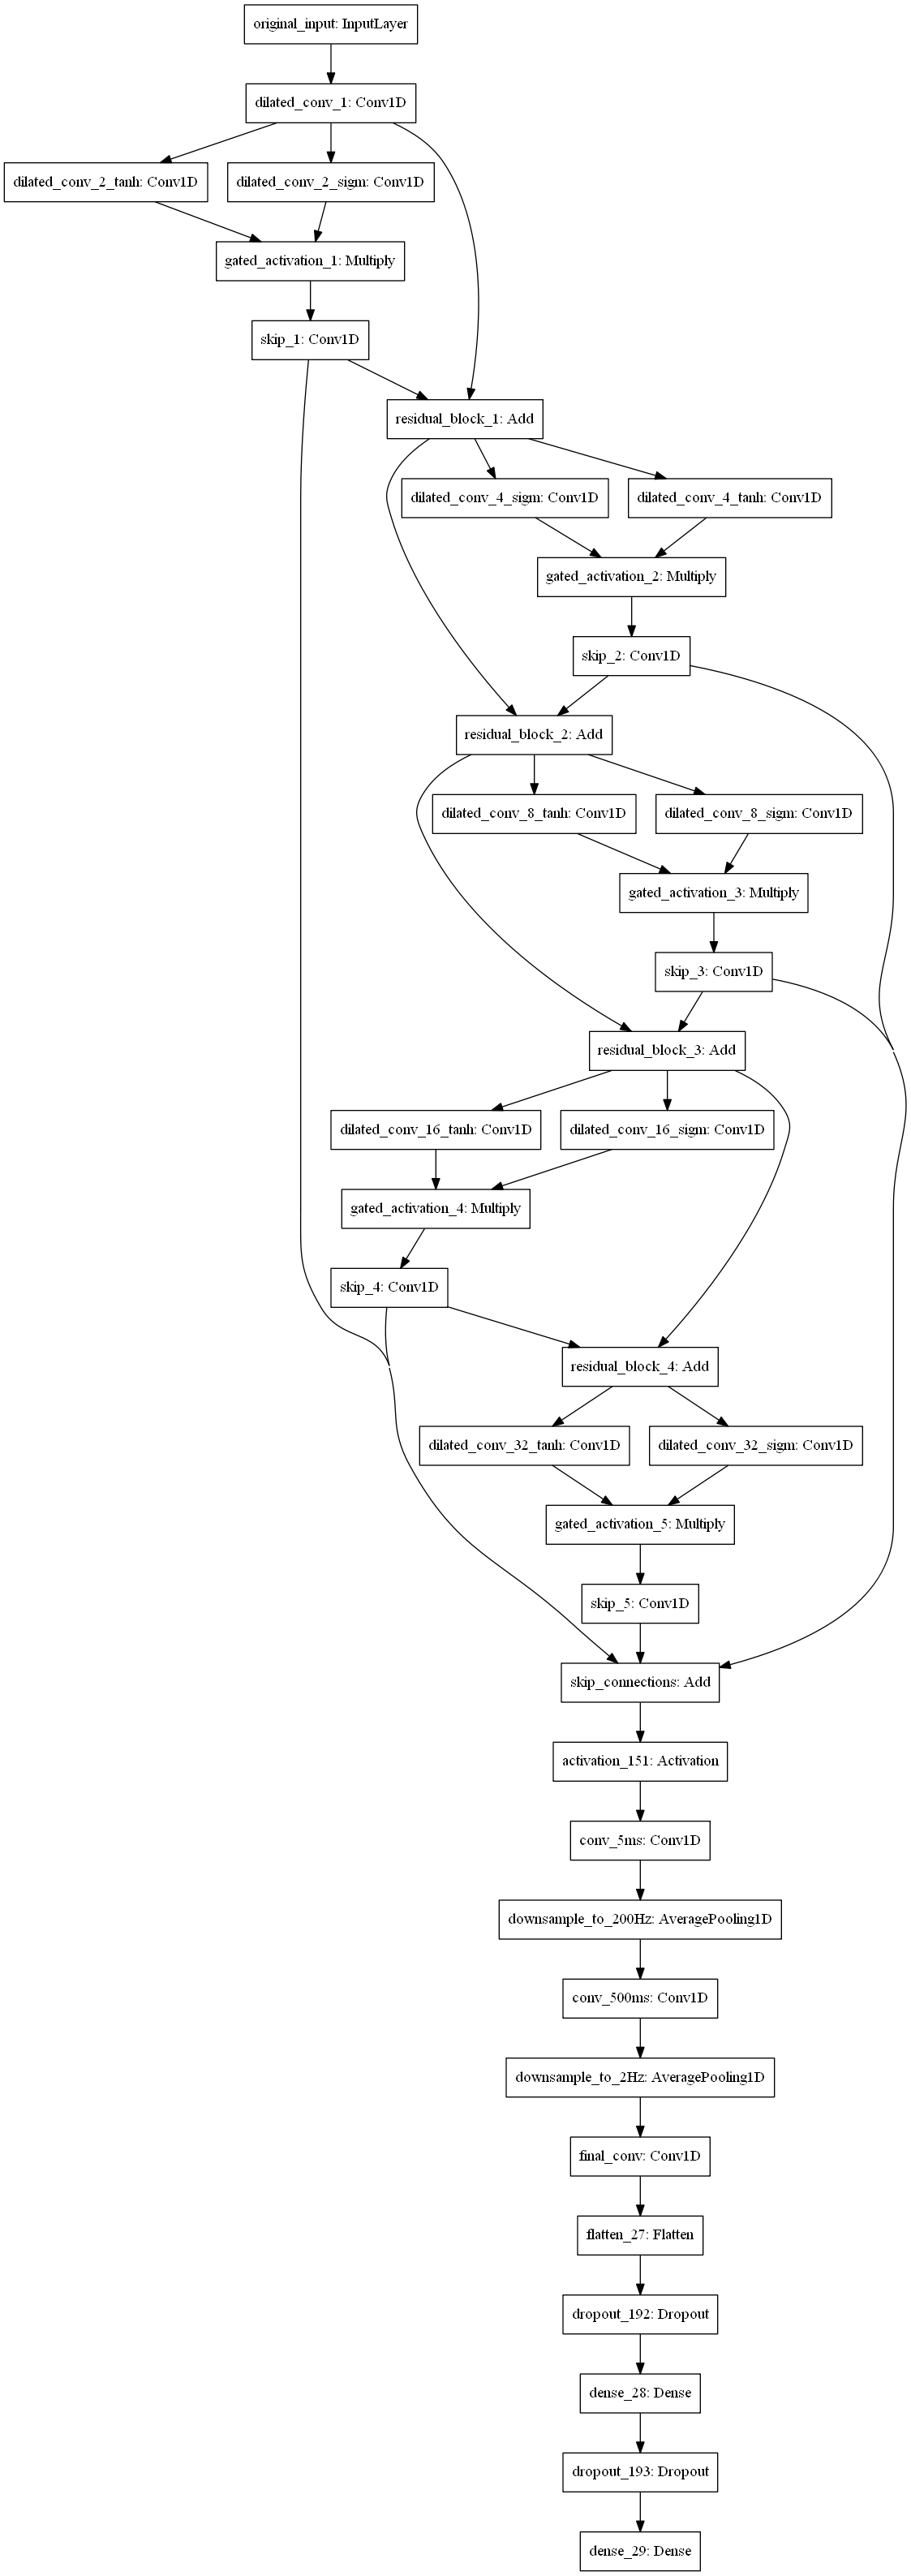

In [181]:
plot_model(model)

In [102]:
model = keras.models.Sequential()
model.add(layers.InputLayer(input_shape=X[:,:,:].shape[1:]))
model.add(layers.Bidirectional(layers.LSTM(52,return_sequences=True)))
model.add(layers.Bidirectional(layers.LSTM(52,return_sequences=True)))
model.add(layers.Conv1D(filters=65, kernel_size=5,padding='same'))
model.add(layers.BatchNormalization(momentum=0.8))
model.add(layers.PReLU())
model.add(layers.Dropout(0.3))
#model.add(layers.MaxPooling1D(2))
model.add(layers.Conv1D(filters=30, kernel_size=5,padding='same'))
model.add(layers.BatchNormalization(momentum=0.8))
model.add(layers.PReLU())
#model.add(layers.MaxPooling1D(2))
#model.add(layers.Flatten())
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(3,activation='softmax'))

In [103]:
model.summary()
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 1024, 104)         25376     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 1024, 104)         65312     
_________________________________________________________________
conv1d_86 (Conv1D)           (None, 1024, 65)          33865     
_________________________________________________________________
batch_normalization_74 (Batc (None, 1024, 65)          260       
_________________________________________________________________
p_re_lu_2 (PReLU)            (None, 1024, 65)          66560     
_________________________________________________________________
dropout_100 (Dropout)        (None, 1024, 65)          0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 512, 65)          

In [ ]:
start = time.time()
train_model(model,X[:,:,:],Y,False)
end = time.time()
print(end-start)

Epoch 1/200
41/41 [==============================] - 69s 2s/step - loss: 0.6893 - accuracy: 0.6914 - val_loss: 0.5124 - val_accuracy: 0.7896
Epoch 2/200
41/41 [==============================] - 92s 2s/step - loss: 0.4635 - accuracy: 0.8258 - val_loss: 0.4889 - val_accuracy: 0.7957
Epoch 3/200
41/41 [==============================] - 81s 2s/step - loss: 0.3352 - accuracy: 0.8747 - val_loss: 0.3911 - val_accuracy: 0.8841
Epoch 4/200
41/41 [==============================] - 77s 2s/step - loss: 0.2480 - accuracy: 0.9244 - val_loss: 0.3602 - val_accuracy: 0.8537
Epoch 5/200
41/41 [==============================] - 87s 2s/step - loss: 0.2077 - accuracy: 0.9312 - val_loss: 0.7077 - val_accuracy: 0.6982
Epoch 6/200
41/41 [==============================] - 107s 3s/step - loss: 0.2273 - accuracy: 0.9343 - val_loss: 0.2739 - val_accuracy: 0.9177
Epoch 7/200
41/41 [==============================] - 101s 2s/step - loss: 0.1495 - accuracy: 0.9610 - val_loss: 0.6062 - val_accuracy: 0.7652
Epoch 8/200

In [133]:
test_model(model,X2[:,:,[0,1,4,5]],Y2,False)

acc:0.800475
[[ 37  13  38]
 [ 16 188   3]
 [  6   8 112]]


0.8004750593824228

In [21]:
y_pred=model.predict(X2[ind][:,:,[0,1,4,5]])

In [22]:
ind = (Y2==1)|(Y2==6)

In [23]:
(y_pred>0.5)

array([[ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [ True, False],
       [ True, False],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [False,  True],
       [Fal

In [24]:
oc = OneHotEncoder()
y=oc.fit_transform(Y2[ind,np.newaxis]).toarray()

In [25]:
ind_1=((y==1)[:,0]==(y_pred>0.5)[:,0])

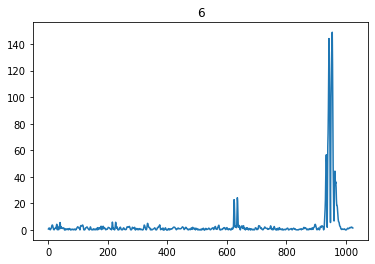

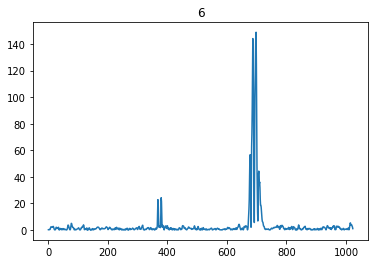

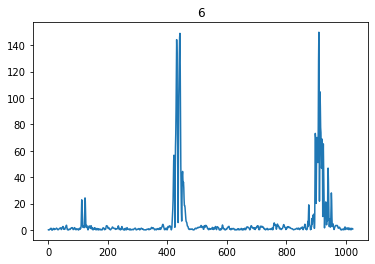

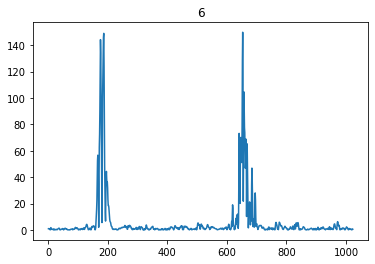

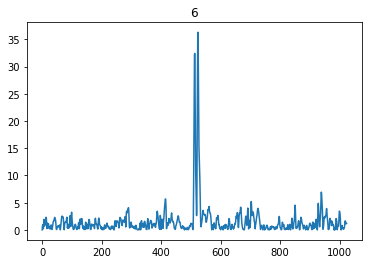

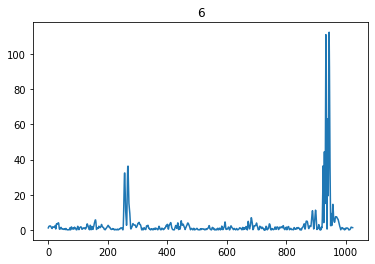

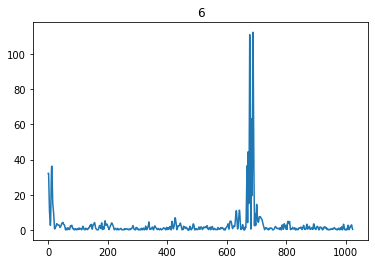

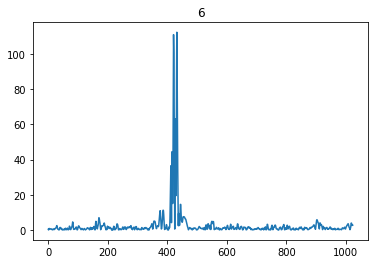

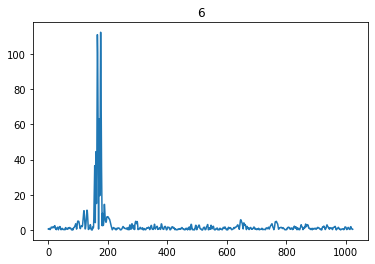

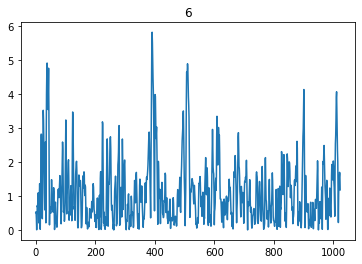

In [73]:
ind = (Y==1)|(Y==6)
n=150
for i in range(10):
    plt.figure()
    plt.plot(X[ind][i+n,:,0])
    plt.title(Y[ind][i+n])
    #plt.ylim((-50,50))

In [27]:
ind_1

array([ True, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True,  True,

In [376]:
X2[ind].shape

(61, 1024, 8)

In [377]:
ind

[17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95]